In [1]:
#draw fixation number for different tap distance
import os
import csv
import codecs
import numpy

In [2]:
# convert x and y to pixels 

def x_cm2pic(x):
    xscale =1838-594 ; x0 = 94; xim = 500
    return x*xscale+x0+xim
    
def y_cm2pic(y):
    yscale =2524-1920 ; y0 = 1720; yim = 200
    return y*yscale+y0+yim

def xy_cm2pic(x,y):
    return [x_cm2pic(x),y_cm2pic(y)]

# return key position
def KeyToXY(key):
    keys_ = ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'å', 'a', 's', 'd', 'f', 
             'g', 'h', 'j', 'k', 'l', 'ö', 'ä', 'z', 'x', 'c', 'v', 'b', 'n', 'm', 'B', ' ']
    xs = [566, 697, 828, 959, 1090, 1221, 1351, 1482, 1613, 1744, 1875, 566, 697, 828, 
          959, 1090, 1221, 1351, 1482, 1613, 1744, 1875, 740, 900, 1060, 1220, 1380, 1540, 
          1700, 1872, 1220]
    ys = [2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2248, 2248, 2248, 
          2248, 2248, 2248, 2248, 2248, 2248, 2248, 2248, 2452, 2452, 2452, 2452, 2452, 2452, 
          2452, 2455, 2656]
    p = keys_.index(key)
    return [xs[p], ys[p]]

In [3]:
def drawGraph(list1, title):
    import matplotlib.pyplot as plt
  
    t = title

    plt.xlabel('Distance(cm)')  
    plt.ylabel('Fixation number')
    plt.title(t)
    plt.xlim(-0.2, 6)
    plt.ylim(-0.2, 7)
    
    dis = []
    fix = []
    for line in list1:
        dis.append(line[0])
        fix.append(line[1])
    
    
    plt.plot(dis, fix ,'ro', alpha=.5)

    plt.savefig(t+".png")
   
    plt.show()

In [4]:
def isInList(character):
    keys_ = ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'å', 'a', 's', 'd', 'f', 
             'g', 'h', 'j', 'k', 'l', 'ö', 'ä', 'z', 'x', 'c', 'v', 'b', 'n', 'm', 'B', ' ']
    if character not in keys_:
        return False
    else:
        return True

In [5]:
# Distance between 2 Keys
def distanceFixationBetweenKeys(fixList):
    
    disFixList = []
    if len(fixList)!=0:    
        for line in fixList:
            if isInList(line[0]) and isInList(line[1]):
                x1 = KeyToXY(line[0])[0]
                y1 = KeyToXY(line[0])[1]
                x2 = KeyToXY(line[1])[0]
                y2 = KeyToXY(line[1])[1]
                
                dispix = numpy.sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1))
                discm = (dispix/100)*0.4448336
                temp = []
                temp.append(discm)
                temp.append(line[2])
                disFixList.append(temp)
            else:
                continue
        return disFixList

In [6]:
def isNumber(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
        return False

In [7]:
def x2cm(x1):
    return x1*5.4586
def y2cm(y1):
    return y1*2.6412

In [8]:
#read all files in tlogs

def readAlltlogs():
    path = '.\\PJ0009\\data\\tlogs_' #文件夹目录  
    files= os.listdir(path) #得到文件夹下的所有文件名称  
    tlogs = []
    for file in files: #遍历文件夹
         sentence = (file.split('.')[0]).split('_')[3]
         block = (file.split('.')[0]).split('_')[2]
         if not os.path.isdir(file): #判断是否是文件夹，不是文件夹才打开  
              f = open(path+"\\"+file, 'r', encoding = 'utf8'); #打开文件
              reader = csv.reader(f)
              flag = 0
              for line in reader:
                #print(line)
                flag = flag + 1
                if flag ==1 or flag==2:
                    continue
                if flag > 2:
                    #add sentence on tlogs
                    temp = line
                    temp.append(block)
                    temp.append(sentence)
                    tlogs.append(temp)
                    line[3] = str(int(line[3].split('.')[0])-120)
              f.close()
    #print (tlogs)
    return tlogs

In [9]:
#get and add event key into tlogList
def addEventKey(tlogList):
    temp = []
    for line in tlogList:
        
        if line[3] == '-120':
            line.append(line[4])
            temp = line
        else:
            if len(line[4])>len(temp[4]):
                n = len(line[4])-1
                str1 = line[4][n]
                line.append(str1)
            if len(line[4])<len(temp[4]):
                line.append('B')
            temp = line
    return tlogList

In [10]:
#delete the rows after the last character in alltlogs

def deleteTheRows(tlogRows):
    flag = 0
    deleteList = []
    for line in tlogRows:
        if len(line)== 7:
            #print(line)
            deleteList.append(flag-1)
            deleteList.append(flag)
        flag = flag + 1
    #delete from the back (biggest index), so need sort
    deleteList1 = sorted(deleteList, reverse = True)
    for item in deleteList1:
        #print(tlogRows[item])
        del tlogRows[item]
    return tlogRows

In [11]:
#read fixations for one subject

def readFixationsForOneSubject(subject):
    path = ".\\PJ0009\\data\\fixations_"
    files= os.listdir(path) #得到文件夹下的所有文件名称
    fixations = []
    for file in files:
        if not os.path.isdir(file) and str(file).split('_')[1]==subject:
            f = codecs.open(path+"/"+file, 'r', encoding = 'utf8')
            reader = csv.reader(f)
            flag = 0
            for line in reader:
                flag = flag + 1
                if flag ==1:
                    continue
                if flag > 1:
                    fixations.append(line)
            f.close()
    return fixations

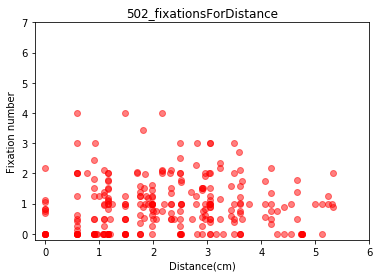

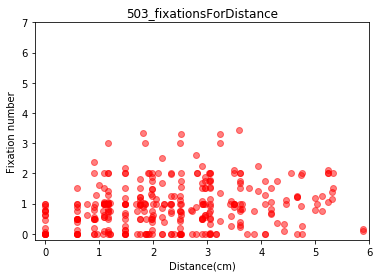

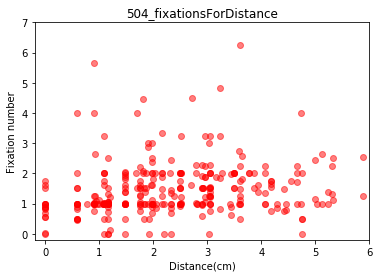

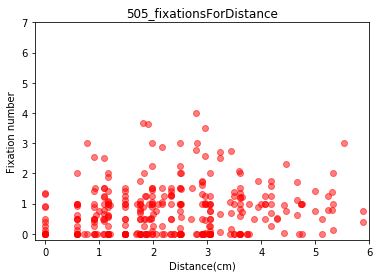

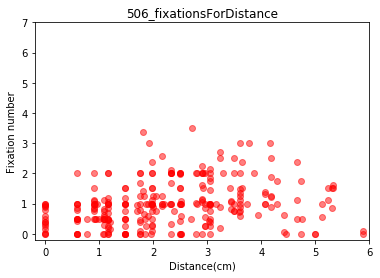

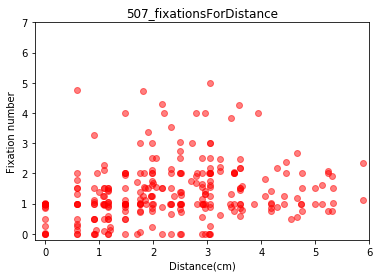

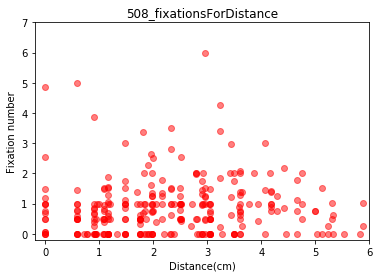

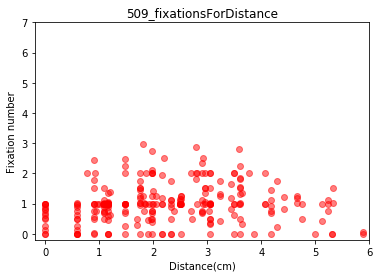

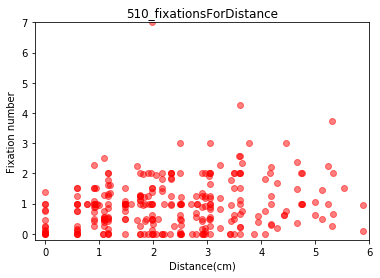

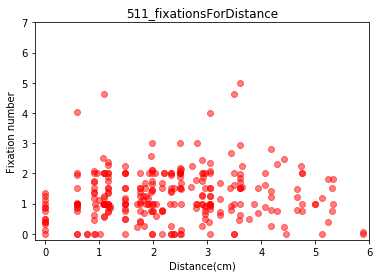

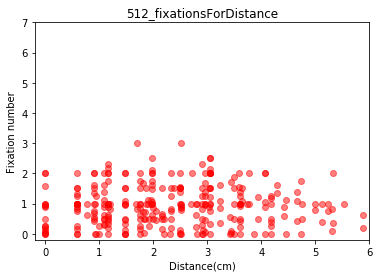

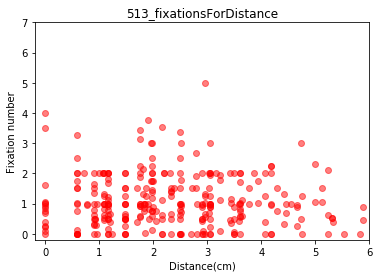

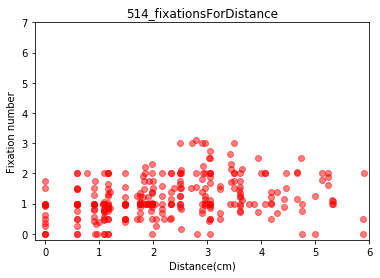

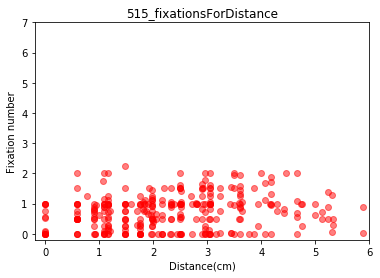

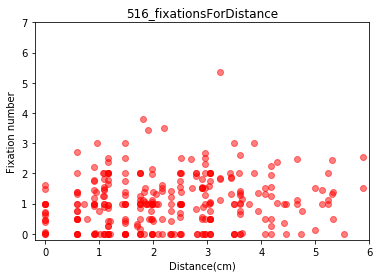

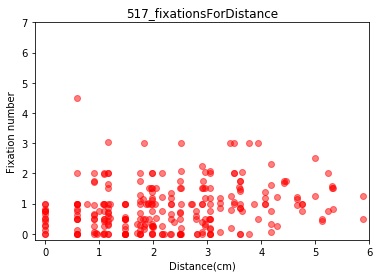

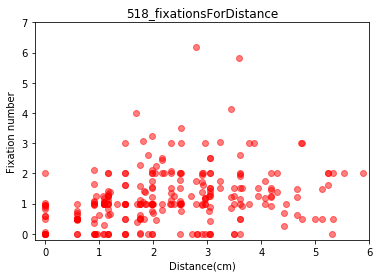

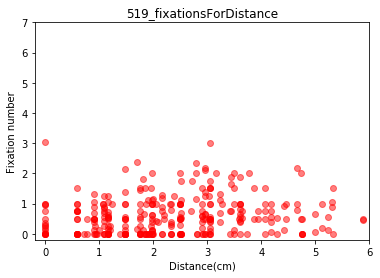

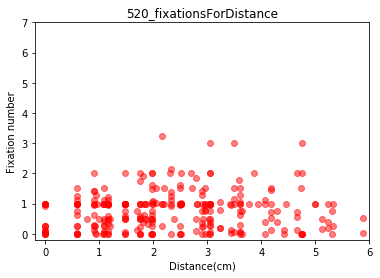

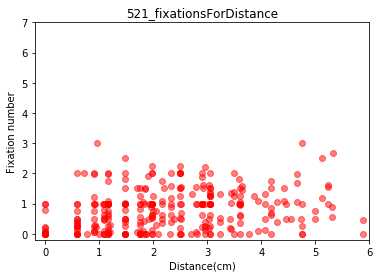

In [12]:
import matplotlib.pyplot as plt
import operator as op

alltlogs = deleteTheRows(addEventKey(readAlltlogs()))

flag = 0
fixationForOneSubject = []
allSubjects = []
keyList = []
numberList = []

#read all subject numbers
for line in alltlogs:
    if line[0] not in allSubjects:
        allSubjects.append(line[0])

for item in allSubjects:
    #calculate for each subject
    fixationForOneSubject = readFixationsForOneSubject(str(item))
    fixationList = []
    for line in alltlogs:
        
        if len(line)==8:
            
            if line[0]==item:
                #find all tlogs for current subject
                if line[3]=='-120':
                    trialtimeBefore = float(line[3])
                    lastKey = line[7]
                    #print(lastKey)

                else:
                    #print(lastKey)
                    flag = flag + 1
                    trialtime = float(line[3])
                    eventKey = line[7]
                    fixNumber = 0
                    currentFix = -1
                    for line1 in fixationForOneSubject:
                        #current sentence, between 2 taps, how many fixations
                        #print(line1[3])
                        #######problems:
                        #1. in some fixation files, trial time was written as system time(much bigger than normal)
                        #2. in some fixation files, trial time was written as a string with characters
                        if not line1[4] == currentFix:
                            #take the first line in all same fixation lines
                            if line1[1]== line[5]:
                                #same block
                                if isNumber(line1[3]):
                                    # don't count lines with character trial time
                                    if line1[2].split('.')[0] == line[6].split('.')[0] and trialtimeBefore<float(line1[3])<trialtime:
                                        # same sentence, time between 2 taps
                                        if 0<x2cm(float(line1[5]))<5.4586 and 0<y2cm(float(line1[6]))<2.6412:
                                            fixNumber = fixNumber + 1
                                            currentFix = line1[4]

                    if len(fixationList)==0:
                        temp = []
                        temp.append(lastKey)
                        temp.append(eventKey)
                        temp.append(fixNumber)
                        fixationList.append(temp)
                    else:
                        flag = 0
                        for line2 in fixationList:
                            if line2[0]==lastKey and line2[1]==eventKey:
                                line2[2] = (line2[2]+fixNumber)/2
                                flag = 1
                        if flag==0:
                            temp = []
                            temp.append(lastKey)
                            temp.append(eventKey)
                            temp.append(fixNumber)
                            fixationList.append(temp)
                    trialtimeBefore = trialtime
                    lastKey = eventKey
    
    fixationList1 = sorted(fixationList, key = op.itemgetter(2))
    #print(fixationList1)
    for dataLine in fixationList1:
        #print(dataLine) 
        keyList.append(dataLine[0]+'→'+dataLine[1])
        numberList.append(dataLine[2]) 
       
    title = item+'_fixationsForDistance'
    
    listDF = distanceFixationBetweenKeys(fixationList)
    drawGraph(listDF, title)
    
    keyList = []
    numberList = []